# Lab Task: Enhancing Backpropagation and Experimenting with Deeper Networks

In this lab, you will extend your previous neural network implementation by adding more layers and optimizing the backpropagation process.

## Part 1: Extending the Neural Network to Multiple Hidden Layers

**Understanding Hidden Layers:**

> A hidden layer in the context of artificial neural networks refers to a layer of neurons that is neither the input nor the output layer. Hidden layers are what make neural networks "deep" and enable them to learn complex data representations. They are the computational workhorse of deep learning models, allowing neural networks to approximate functions and capture patterns from input data.

**Role of Hidden Layers:**

> The primary role of hidden layers is to transform inputs into something that the output layer can use. They do this by applying weights to the inputs and passing them through an activation function. This process allows the network to learn non-linear relationships between the input and output data.

**Task:** Modify your neural network from last week to handle multiple hidden layers. You will create a 3-layer network with two hidden layers.

- Input layer: Same as before (2 neurons)
- Hidden layer 1: 4 neurons (`tanh` activation)
- Hidden layer 2: 3 neurons (`ReLU` activation)
- Output layer: 1 neuron (`sigmoid` activation)

**Deliverables:**
- Code implementing the extended neural network with forward and backpropagation.
- A plot showing the loss curve over 1000 iterations.

# Imports


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

# Activations for more Parameterized Functions

In [ ]:
# Activation functions
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def relu(Z):
    return np.maximum(0, Z)

def tanh(Z):
    return np.tanh(Z)

def relu_derivative(Z):
    return np.where(Z > 0, 1, 0)

def sigmoid_derivative(A):
    return A * (1 - A)

def tanh_derivative(A):
    return 1 - np.power(A, 2)

# Data Loading and Visualization

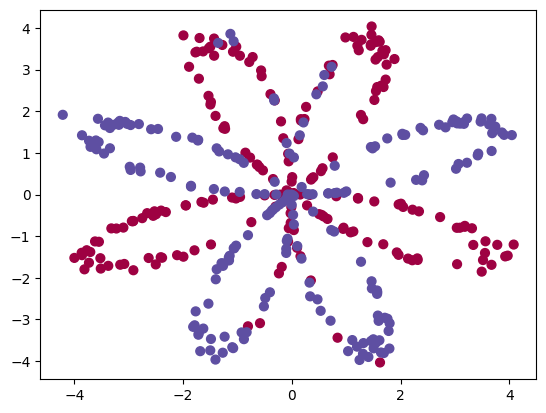

In [ ]:
np.random.seed(1) # set a seed so that the results are consistent

X, Y = load_planar_dataset()

# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

Helping Functions

In [ ]:
# Custom layer sized as required
def layer_sizes(X, Y):
    n_x = X.shape[0]  # size of the input layer (2 features)
    n_h1 = 4          # number of neurons in hidden layer 1
    n_h2 = 3          # number of neurons in hidden layer 2
    n_y = 1           # size of the output layer (binary classification)
    return n_x, n_h1, n_h2, n_y

def initialize_parameters(n_x, n_h1, n_h2, n_y):
    np.random.seed(2)
    # Layer 1
    W1 = np.random.randn(n_h1, n_x) * 0.01
    b1 = np.zeros((n_h1, 1))
    # Layer 2
    W2 = np.random.randn(n_h2, n_h1) * 0.01
    b2 = np.zeros((n_h2, 1))
    # Output layer (Layer 3)
    W3 = np.random.randn(n_y, n_h2) * 0.01
    b3 = np.zeros((n_y, 1))

    parameters = {
        "W1": W1, "b1": b1,
        "W2": W2, "b2": b2,
        "W3": W3, "b3": b3
    }
    return parameters

# Forward propagation with parameterized activation functions
def forward_propagation(X, parameters, hidden_activation1=tanh, hidden_activation2=relu, output_activation=sigmoid):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]

    # First hidden layer
    Z1 = np.dot(W1, X) + b1
    A1 = hidden_activation1(Z1)

    # Second hidden layer
    Z2 = np.dot(W2, A1) + b2
    A2 = hidden_activation2(Z2)

    # Output layer
    Z3 = np.dot(W3, A2) + b3
    A3 = output_activation(Z3)

    cache = {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2, "Z3": Z3, "A3": A3}
    return A3, cache

# Compute cost function
def compute_cost(A3, Y):
    m = Y.shape[1]
    cost = np.multiply(np.log(A3), Y) + np.multiply(np.log(1 - A3), 1 - Y)
    cost = -1/m * np.nansum(cost)
    cost = float(np.squeeze(cost))
    return cost

# Backward propagation with parameterized activation functions
def backward_propagation(parameters, cache, X, Y, hidden_activation1_derivative=sigmoid_derivative, hidden_activation2_derivative=relu_derivative, output_activation_derivative=sigmoid_derivative
    ):
    m = X.shape[1]

    # Retrieve parameters
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    W3 = parameters["W3"]

    # Retrieve cache
    A1 = cache['A1']
    A2 = cache['A2']
    A3 = cache['A3']
    Z2 = cache['Z2']
    Z1 = cache['Z1']

    # Output layer error
    dZ3 = A3 - Y  # Sigmoid output layer assumed
    dW3 = 1/m * np.dot(dZ3, A2.T)
    db3 = 1/m * np.sum(dZ3, axis=1, keepdims=True)

    # Second hidden layer error
    dZ2 = np.dot(W3.T, dZ3) * hidden_activation2_derivative(Z2)
    dW2 = 1/m * np.dot(dZ2, A1.T)
    db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)

    # First hidden layer error
    dZ1 = np.dot(W2.T, dZ2) * hidden_activation1_derivative(Z1)
    dW1 = 1/m * np.dot(dZ1, X.T)
    db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)

    grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2, "dW3": dW3, "db3": db3}
    return grads

def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent

    Arguments:
    parameters -- python dictionary containing your parameters
    grads -- python dictionary containing your gradients for each parameter
    learning_rate -- the learning rate, scalar

    Returns:
    parameters -- python dictionary containing your updated parameters
    """

    # Update rule for each parameter
    parameters["W1"] = parameters["W1"] - learning_rate * grads["dW1"]
    parameters["b1"] = parameters["b1"] - learning_rate * grads["db1"]
    parameters["W2"] = parameters["W2"] - learning_rate * grads["dW2"]
    parameters["b2"] = parameters["b2"] - learning_rate * grads["db2"]
    parameters["W3"] = parameters["W3"] - learning_rate * grads["dW3"]
    parameters["b3"] = parameters["b3"] - learning_rate * grads["db3"]

    return parameters


def predict(parameters, X):
    A3, cache = forward_propagation(X, parameters)
    predictions = np.where(A3 > 0.5, 1.0, 0.0)
    return predictions

In [ ]:
def nn_model(X, Y, n_h1, n_h2, learning_rate, num_iterations=1000,  hidden_activation1 = tanh, hidden_activation2 = relu, output_activation = sigmoid, hidden_activation1_derivative = tanh_derivative, hidden_activation2_derivative = relu_derivative, output_activation_derivative = sigmoid_derivative, print_cost=False):
    np.random.seed(3)
    n_x = X.shape[0]  # input layer size
    n_y = Y.shape[0]  # output layer size

    # Initialize parameters
    parameters = initialize_parameters(n_x, n_h1, n_h2, n_y)

    # List to keep track of cost during iterations
    costs = []

    # Gradient descent loop
    for i in range(0, num_iterations):
        # Forward propagation
        A3, cache = forward_propagation(X, parameters, hidden_activation1, hidden_activation2, output_activation)

        # Compute cost
        cost = compute_cost(A3, Y)

        # Backward propagation
        grads = backward_propagation(parameters, cache, X, Y, hidden_activation1_derivative, hidden_activation2_derivative, output_activation_derivative)

        # Update parameters
        parameters = update_parameters(parameters, grads, learning_rate)

        # Track cost
        if i % 100 == 0:
            costs.append(cost)
            if print_cost:
                print("Cost after iteration {}: {}".format(i, cost))

    return parameters, costs

# Pre Implemented Logistic Regression Code

c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C:\Users\dell\AppData\Local\Temp\ipykernel_3244\1701087354.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +


Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


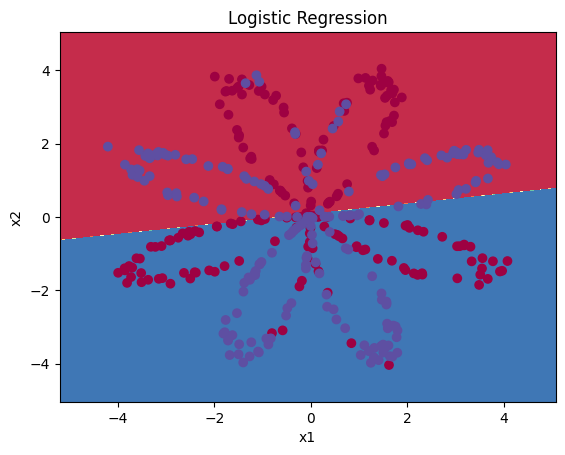

In [ ]:
# Data Shapes
shape_X = X.shape
shape_Y = Y.shape
m = len(X)

# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(X.T, Y.T);

# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Logistic Regression")

# Print accuracy
LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

C:\Users\dell\AppData\Local\Temp\ipykernel_3244\2054144994.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')


Accuracy: 50%


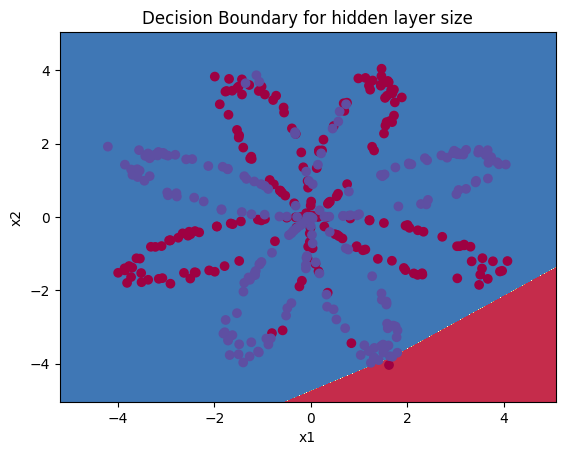

In [ ]:

parameters, costs = nn_model(X, Y, 4, 3, 1.2, num_iterations=1000, print_cost=False)

predictions=predict(parameters, X)


# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size")

print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')


Cost after iteration 0: 0.6931477611235748
Cost after iteration 100: 0.6931471795822644
Cost after iteration 200: 0.6931471795798573
Cost after iteration 300: 0.6931471795774443
Cost after iteration 400: 0.6931471795750261
Cost after iteration 500: 0.6931471795726065
Cost after iteration 600: 0.6931471795701768
Cost after iteration 700: 0.6931471795677415
Cost after iteration 800: 0.6931471795653004
Cost after iteration 900: 0.6931471795628533


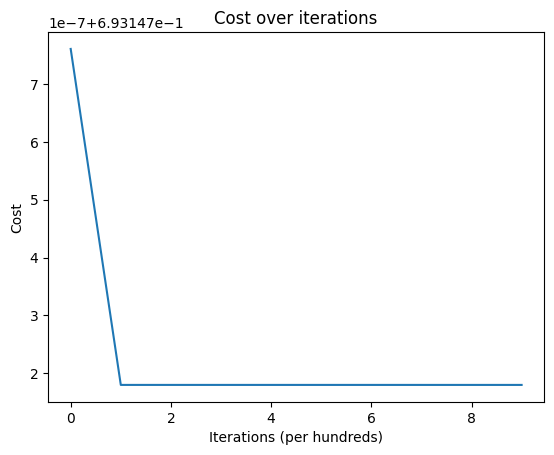

In [ ]:
# Model for specific NN architecture
parameters, costs = nn_model(X, Y, 4, 3, 1.2, num_iterations=1000, print_cost=True)

# Plot the cost over iterations
plt.plot(costs)
plt.ylabel('Cost')
plt.xlabel('Iterations (per hundreds)')
plt.title('Cost over iterations')
plt.show()

## Part 2: Experimenting with Different Activation Functions

**Understanding Activation Functions:**

> Activation functions are crucial to the learning capability of neural networks. They introduce non-linear properties to the network, allowing it to learn more complex patterns. Common activation functions include the sigmoid, tanh, and ReLU (Rectified Linear Unit).

**Task:** Experiment with different activation functions (`tanh`, `ReLU`, `Leaky ReLU`) and observe their impact on training performance.

**Deliverables:**
- Plots comparing the loss curves for each activation function.
- A brief explanation of the results.

# Sigmoid

Cost after iteration 0: 0.6931477611235748
Cost after iteration 100: 0.6931471795822644
Cost after iteration 200: 0.6931471795798573
Cost after iteration 300: 0.6931471795774443
Cost after iteration 400: 0.6931471795750261
Cost after iteration 500: 0.6931471795726065
Cost after iteration 600: 0.6931471795701768
Cost after iteration 700: 0.6931471795677415
Cost after iteration 800: 0.6931471795653004
Cost after iteration 900: 0.6931471795628533


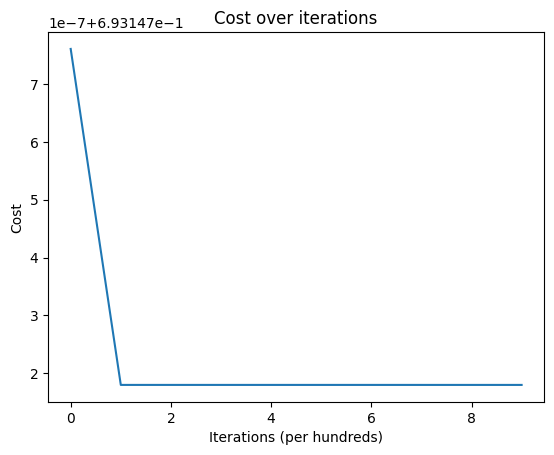

Accuracy: 50%


C:\Users\dell\AppData\Local\Temp\ipykernel_3244\3579943940.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')


In [ ]:
# Comparing Last Layer activations
# Model for specific NN architecture
parameters, costs = nn_model(X, Y, 4, 3, 1.2, num_iterations=1000, output_activation=sigmoid, output_activation_derivative=sigmoid_derivative, print_cost=True)

# Plot the cost over iterations
plt.plot(costs)
plt.ylabel('Cost')
plt.xlabel('Iterations (per hundreds)')
plt.title('Cost over iterations')
plt.show()

print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')


In [ ]:
# Implement different activation functions and test their performance
def relu(Z):
    return np.maximum(0, Z)

def relu_derivative(Z):
    return np.where(Z > 0, 1, 0)

def leaky_relu(Z):
    return np.where(Z > 0, Z, 0.01 * Z)

def leaky_relu_derivative(Z):
    return np.where(Z > 0, 1, 0.01)


# Modify your network to test these activation functions


# Relu

C:\Users\dell\AppData\Local\Temp\ipykernel_3244\1408774772.py:55: RuntimeWarning: divide by zero encountered in log
  cost = np.multiply(np.log(A3), Y) + np.multiply(np.log(1 - A3), 1 - Y)
C:\Users\dell\AppData\Local\Temp\ipykernel_3244\1408774772.py:55: RuntimeWarning: invalid value encountered in multiply
  cost = np.multiply(np.log(A3), Y) + np.multiply(np.log(1 - A3), 1 - Y)


Cost after iteration 0: inf
Cost after iteration 100: 0.6931471803653727
Cost after iteration 200: 0.693147180364785
Cost after iteration 300: 0.6931471803641972
Cost after iteration 400: 0.6931471803636086
Cost after iteration 500: 0.6931471803630224
Cost after iteration 600: 0.6931471803624325
Cost after iteration 700: 0.6931471803618426
Cost after iteration 800: 0.6931471803612514
Cost after iteration 900: 0.6931471803606601


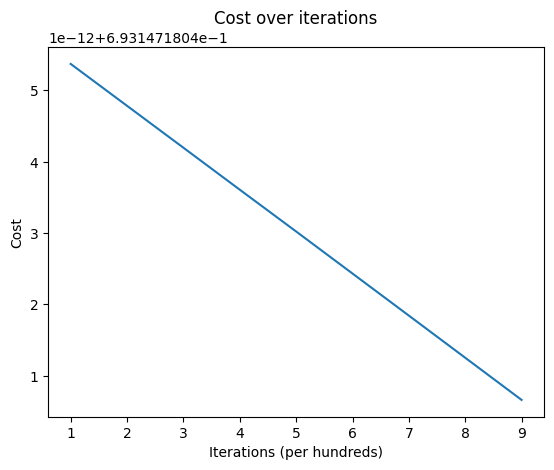

Accuracy: 50%


C:\Users\dell\AppData\Local\Temp\ipykernel_3244\2169961251.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')


In [ ]:
# Comparing Last Layer activations
# Model for specific NN architecture
parameters, costs = nn_model(X, Y, 4, 3, 1.2, num_iterations=1000, output_activation=relu, output_activation_derivative=relu_derivative, print_cost=True)

# Plot the cost over iterations
plt.plot(costs)
plt.ylabel('Cost')
plt.xlabel('Iterations (per hundreds)')
plt.title('Cost over iterations')
plt.show()

print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')


# Leaky Relu

C:\Users\dell\AppData\Local\Temp\ipykernel_3244\1408774772.py:55: RuntimeWarning: divide by zero encountered in log
  cost = np.multiply(np.log(A3), Y) + np.multiply(np.log(1 - A3), 1 - Y)
C:\Users\dell\AppData\Local\Temp\ipykernel_3244\1408774772.py:55: RuntimeWarning: invalid value encountered in log
  cost = np.multiply(np.log(A3), Y) + np.multiply(np.log(1 - A3), 1 - Y)
C:\Users\dell\AppData\Local\Temp\ipykernel_3244\1408774772.py:55: RuntimeWarning: invalid value encountered in multiply
  cost = np.multiply(np.log(A3), Y) + np.multiply(np.log(1 - A3), 1 - Y)


Cost after iteration 0: 3.021179868106585
Cost after iteration 100: 0.6931471803653726
Cost after iteration 200: 0.6931471803647853
Cost after iteration 300: 0.693147180364197
Cost after iteration 400: 0.6931471803636083
Cost after iteration 500: 0.6931471803630223
Cost after iteration 600: 0.6931471803624325
Cost after iteration 700: 0.6931471803618423
Cost after iteration 800: 0.6931471803612516
Cost after iteration 900: 0.6931471803606601


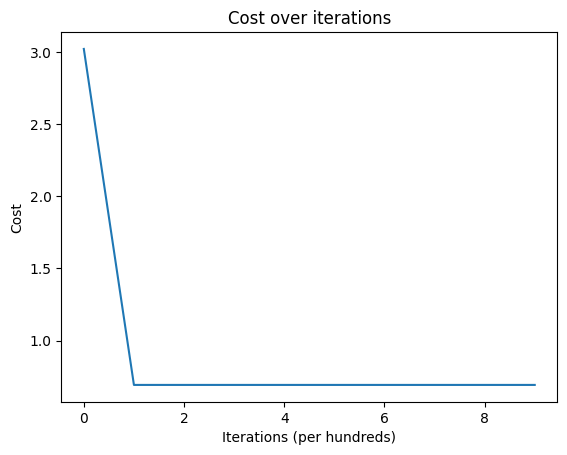

Accuracy: 50%


C:\Users\dell\AppData\Local\Temp\ipykernel_3244\2254302694.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')


In [ ]:
# Comparing Last Layer activations
# Model for specific NN architecture
parameters, costs = nn_model(X, Y, 4, 3, 1.2, num_iterations=1000, output_activation=leaky_relu, output_activation_derivative=leaky_relu_derivative, print_cost=True)

# Plot the cost over iterations
plt.plot(costs)
plt.ylabel('Cost')
plt.xlabel('Iterations (per hundreds)')
plt.title('Cost over iterations')
plt.show()

print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')


## Part 3: Optimizing Backpropagation with Advanced Techniques

**Task:** Implement optimization techniques like weight initialization (Xavier, He), gradient clipping, or momentum.

**Deliverables:**
- Code with optimization techniques applied.
- A comparison of loss curves before and after applying these techniques.

# Initialization Optimization Techniques

In [ ]:
def initialize_parameters(n_x, n_h1, n_h2, n_y, init_method='he'):
    """
    Initialize parameters using different methods (Xavier, He).
    """
    np.random.seed(1)

    if init_method == 'xavier':
        W1 = np.random.randn(n_h1, n_x) * np.sqrt(1. / n_x)
        W2 = np.random.randn(n_h2, n_h1) * np.sqrt(1. / n_h1)
        W3 = np.random.randn(n_y, n_h2) * np.sqrt(1. / n_h2)
    elif init_method == 'he':
        W1 = np.random.randn(n_h1, n_x) * np.sqrt(2. / n_x)
        W2 = np.random.randn(n_h2, n_h1) * np.sqrt(2. / n_h1)
        W3 = np.random.randn(n_y, n_h2) * np.sqrt(2. / n_h2)
    else:
        # Default small random initialization
        W1 = np.random.randn(n_h1, n_x) * 0.01
        W2 = np.random.randn(n_h2, n_h1) * 0.01
        W3 = np.random.randn(n_y, n_h2) * 0.01

    b1 = np.zeros((n_h1, 1))
    b2 = np.zeros((n_h2, 1))
    b3 = np.zeros((n_y, 1))

    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2, "W3": W3, "b3": b3}

    return parameters


# Gradient Clipping and Momentum Option

In [ ]:
def backward_propagation(parameters, cache, X, Y, activation1_derivative=tanh_derivative, activation2_derivative=relu_derivative,
                         clip_gradients=False, momentum=False, beta=0.9, learning_rate=1.2):
    m = X.shape[1]

    # Retrieve parameters
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    W3 = parameters["W3"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]
    b3 = parameters["b3"]

    # Retrieve cache
    A1 = cache['A1']
    A2 = cache['A2']
    A3 = cache['A3']
    Z2 = cache['Z2']
    Z1 = cache['Z1']

    # Output layer error
    dZ3 = A3 - Y
    dW3 = 1/m * np.dot(dZ3, A2.T)
    db3 = 1/m * np.sum(dZ3, axis=1, keepdims=True)

    # Second hidden layer error
    dZ2 = np.dot(W3.T, dZ3) * activation2_derivative(Z2)
    dW2 = 1/m * np.dot(dZ2, A1.T)
    db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)

    # First hidden layer error
    dZ1 = np.dot(W2.T, dZ2) * activation1_derivative(Z1)
    dW1 = 1/m * np.dot(dZ1, X.T)
    db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)

    # Option for gradient clipping
    if clip_gradients:
        max_value = 1.0  # Clip gradients to this max value
        dW1 = np.clip(dW1, -max_value, max_value)
        db1 = np.clip(db1, -max_value, max_value)
        dW2 = np.clip(dW2, -max_value, max_value)
        db2 = np.clip(db2, -max_value, max_value)
        dW3 = np.clip(dW3, -max_value, max_value)
        db3 = np.clip(db3, -max_value, max_value)

    # Option for momentum
    if momentum:
        VdW1, Vdb1, VdW2, Vdb2, VdW3, Vdb3 = (
            np.zeros_like(W1), np.zeros_like(db1),
            np.zeros_like(W2), np.zeros_like(db2),
            np.zeros_like(W3), np.zeros_like(db3),
        )

        # Update velocities
        VdW1 = beta * VdW1 + (1 - beta) * dW1
        Vdb1 = beta * Vdb1 + (1 - beta) * db1
        VdW2 = beta * VdW2 + (1 - beta) * dW2
        Vdb2 = beta * Vdb2 + (1 - beta) * db2
        VdW3 = beta * VdW3 + (1 - beta) * dW3
        Vdb3 = beta * Vdb3 + (1 - beta) * db3

        # Apply momentum to parameter updates
        W1 -= learning_rate * VdW1
        b1 -= learning_rate * Vdb1
        W2 -= learning_rate * VdW2
        b2 -= learning_rate * Vdb2
        W3 -= learning_rate * VdW3
        b3 -= learning_rate * Vdb3
    else:
        # Standard gradient descent updates
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
        W3 -= learning_rate * dW3
        b3 -= learning_rate * db3

    grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2, "dW3": dW3, "db3": db3}
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2, "W3": W3, "b3": b3}

    return parameters, grads


# Refactored Custom Neural Network

In [ ]:
def nn_model(X, Y, n_h1, n_h2, learning_rate, num_iterations=1000, print_cost=False,
             init_method='he', clip_gradients=False, momentum=False, beta=0.9):

    n_x = X.shape[0]
    n_y = Y.shape[0]
    costs = []
    # Initialize parameters with a chosen method
    parameters = initialize_parameters(n_x, n_h1, n_h2, n_y, init_method)

    for i in range(num_iterations):
        # Forward propagation
        A3, cache = forward_propagation(X, parameters)

        # Compute cost
        cost = compute_cost(A3, Y)

        # Backward propagation with options for clipping and momentum
        parameters, grads = backward_propagation(
            parameters, cache, X, Y, relu_derivative, leaky_relu_derivative,
            clip_gradients=clip_gradients, momentum=momentum, beta=beta, learning_rate=learning_rate
        )

        # Print the cost every 100 iterations
        if print_cost and i % 100 == 0:
            costs.append(cost)
            print("Cost after iteration {}: {}".format(i, cost))

    return parameters, costs


# Without Optimization

Cost after iteration 0: 0.711990732352401
Cost after iteration 100: 0.6680336472979415
Cost after iteration 200: 0.6625753931838633
Cost after iteration 300: 0.6822412440496323
Cost after iteration 400: 0.6793378277479343
Cost after iteration 500: 0.6777625741072055
Cost after iteration 600: 0.6797475909400862
Cost after iteration 700: 0.6794798407536203
Cost after iteration 800: 0.6723380317636845
Cost after iteration 900: 0.6580663584411127


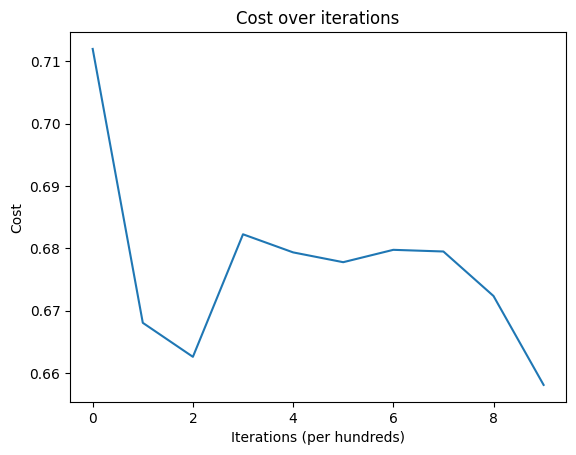

Accuracy: 50%


C:\Users\dell\AppData\Local\Temp\ipykernel_3244\30999864.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')


In [ ]:
# Model for specific NN architecture
parameters, costs = nn_model(X, Y, 4, 3, learning_rate=0.1, num_iterations=1000, print_cost=True)
# Plot the cost over iterations
plt.plot(costs)
plt.ylabel('Cost')
plt.xlabel('Iterations (per hundreds)')
plt.title('Cost over iterations')
plt.show()

print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')


# With Xavier Initialization and Gradient Clipping

Cost after iteration 0: 0.6982474049908065
Cost after iteration 100: 0.6767295486788543
Cost after iteration 200: 0.6595044967557526
Cost after iteration 300: 0.6454083080935904
Cost after iteration 400: 0.6425157368168946
Cost after iteration 500: 0.6467596572388987
Cost after iteration 600: 0.6544501058260838
Cost after iteration 700: 0.6592971438989562
Cost after iteration 800: 0.6641493966870365
Cost after iteration 900: 0.6689724278571855


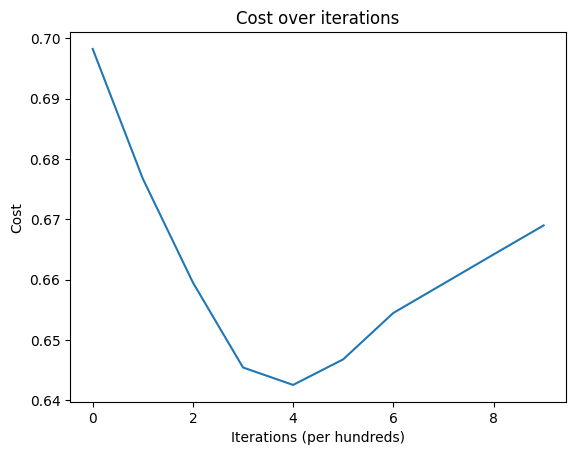

Accuracy: 50%


C:\Users\dell\AppData\Local\Temp\ipykernel_3244\4035081388.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')


In [ ]:
parameters, costs = nn_model(X, Y, 4, 3, learning_rate=0.1, num_iterations=1000, print_cost=True,
                      init_method='xavier', clip_gradients=True)

# Plot the cost over iterations
plt.plot(costs)
plt.ylabel('Cost')
plt.xlabel('Iterations (per hundreds)')
plt.title('Cost over iterations')
plt.show()

print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')


# With He Initialization, Gradient Clipping, and Momentum

Cost after iteration 0: 0.711990732352401
Cost after iteration 100: 0.6948080679970207
Cost after iteration 200: 0.6869021592498591
Cost after iteration 300: 0.6833586258321771
Cost after iteration 400: 0.6813690709129467
Cost after iteration 500: 0.6769353911462369
Cost after iteration 600: 0.6749554609318557
Cost after iteration 700: 0.673199027752849
Cost after iteration 800: 0.6715386501410359
Cost after iteration 900: 0.6697817735982443


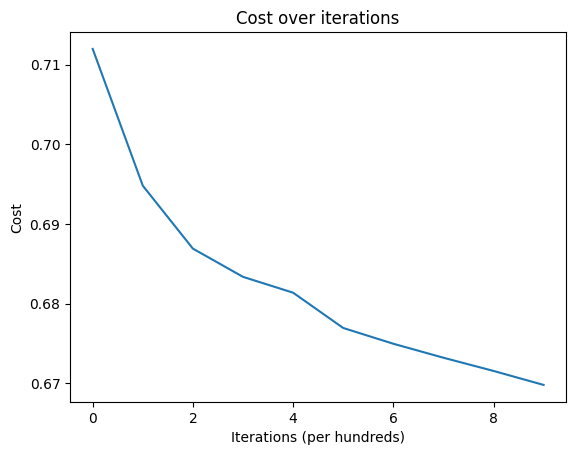

Accuracy: 50%


C:\Users\dell\AppData\Local\Temp\ipykernel_3244\1855509287.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')


In [ ]:
parameters, costs = nn_model(X, Y, 4, 3, learning_rate=0.1, num_iterations=1000, print_cost=True,
                      init_method='he', clip_gradients=True, momentum=True, beta=0.9)


# Plot the cost over iterations
plt.plot(costs)
plt.ylabel('Cost')
plt.xlabel('Iterations (per hundreds)')
plt.title('Cost over iterations')
plt.show()

print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

## Part 4: Learning Rate Tuning

**Task:** Experiment with different learning rates and observe how they impact the speed of convergence.

Choose several learning rates (e.g., 0.01, 0.1, 0.5) and run your network for each learning rate.
Plot the loss curve for each learning rate and compare them.

**Deliverables:**
- A plot of the loss curves for different learning rates.
- A discussion on how learning rate affects convergence.

# Learning Rates

Cost after iteration 0: 0.711990732352401
Cost after iteration 100: 0.6948080679970207
Cost after iteration 200: 0.686902159249859
Cost after iteration 300: 0.6833586258321772
Cost after iteration 400: 0.6813690709129467
Cost after iteration 500: 0.6769353911462369
Cost after iteration 600: 0.6749554609318557
Cost after iteration 700: 0.673199027752849
Cost after iteration 800: 0.6715386501410359
Cost after iteration 900: 0.6697817735982443


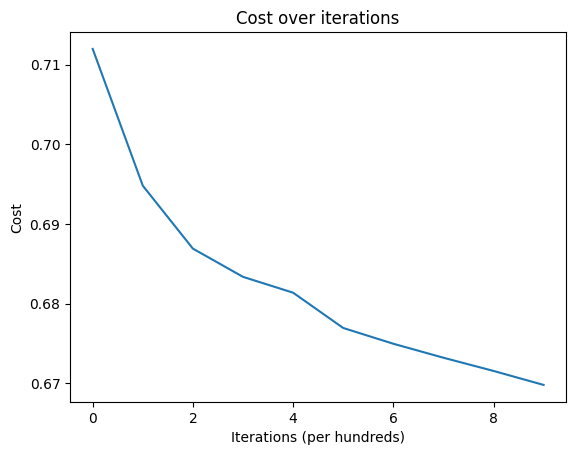

C:\Users\dell\AppData\Local\Temp\ipykernel_3244\3200972974.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')


Accuracy: 50%
Cost after iteration 0: 0.711990732352401
Cost after iteration 100: 0.6680336472979415
Cost after iteration 200: 0.6625753931838633
Cost after iteration 300: 0.6822412440496323
Cost after iteration 400: 0.6793378277479343
Cost after iteration 500: 0.6777625741072055
Cost after iteration 600: 0.6797475909400862
Cost after iteration 700: 0.6794798407536203
Cost after iteration 800: 0.6723380317636845
Cost after iteration 900: 0.6580663584411127


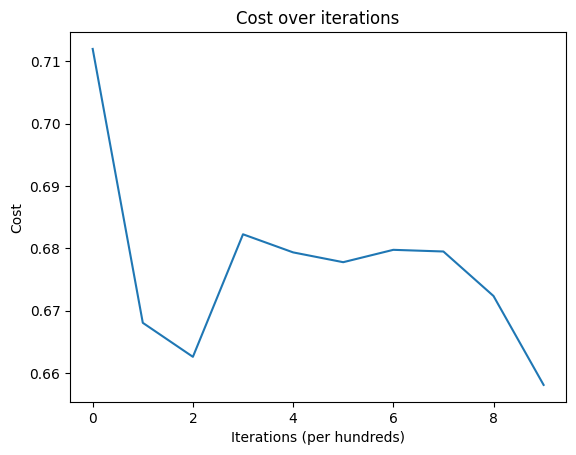

Accuracy: 50%
Cost after iteration 0: 0.711990732352401
Cost after iteration 100: 0.6777193259665529
Cost after iteration 200: 0.6507278419900445
Cost after iteration 300: 0.5376796779018799
Cost after iteration 400: 0.6095047701287245
Cost after iteration 500: 0.657306662087276
Cost after iteration 600: 0.5839553103856082
Cost after iteration 700: 0.566231653534589
Cost after iteration 800: 0.6492500076732334
Cost after iteration 900: 0.6365303743662786


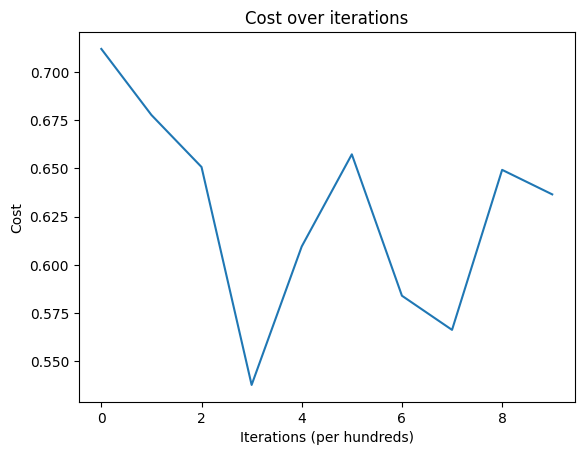

Accuracy: 50%


In [ ]:
# Implement different learning rates and compare their performance
learning_rates = [0.01, 0.1, 0.5]
# Modify your training loop to try different learning rates and plot the loss curves for each

for alpha in learning_rates:
    # Comparing Last Layer activations
    # Model for specific NN architecture
    parameters, costs = nn_model(X, Y, 4, 3, alpha, num_iterations=1000,   print_cost=True)

    # Plot the cost over iterations
    plt.plot(costs)
    plt.ylabel('Cost')
    plt.xlabel('Iterations (per hundreds)')
    plt.title('Cost over iterations')
    plt.show()

    print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')



## Part 5: Mini-batch Gradient Descent

**Task:** Implement mini-batch gradient descent and compare its performance with standard batch gradient descent.

- Split the dataset into mini-batches (e.g., 64 samples per batch).
- Run the training process using mini-batch gradient descent.
- Compare the loss curve and accuracy with batch gradient descent.

**Deliverables:**
- Code implementing mini-batch gradient descent.
- A comparison plot of loss curves for batch and mini-batch gradient descent.

# Redefining Normal Functions without Optimization Techinques

In [ ]:
def forward_propagation(X, parameters):
    """
    Implements the forward propagation for a 3-layer neural network.

    Arguments:
    X -- input data of size (input size, number of examples)
    parameters -- python dictionary containing your parameters:
                    W1, b1, W2, b2, W3, b3

    Returns:
    A3 -- The output of the last layer (the prediction)
    cache -- a dictionary containing "Z1", "A1", "Z2", "A2", "Z3", "A3"; stored for backward propagation
    """

    # Retrieve parameters
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']

    # Forward propagation: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
    Z1 = np.dot(W1, X) + b1
    A1 = np.maximum(0, Z1)  # ReLU activation
    Z2 = np.dot(W2, A1) + b2
    A2 = np.maximum(0, Z2)  # ReLU activation
    Z3 = np.dot(W3, A2) + b3
    A3 = 1 / (1 + np.exp(-Z3))  # Sigmoid activation

    # Cache all values for backward propagation
    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3)

    return A3, cache

def compute_cost(A3, Y):
    """
    Implement the cost function

    Arguments:
    A3 -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (0 if red, 1 if blue), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """

    m = Y.shape[1]  # number of examples

    # Compute the cross-entropy cost
    cost = -(1 / m) * np.sum(Y * np.log(A3) + (1 - Y) * np.log(1 - A3))

    cost = np.squeeze(cost)  # makes sure cost is the shape we expect (e.g., turns [[17]] into 17)
    return cost

def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.

    Arguments:
    parameters -- python dictionary containing your parameters
    cache -- a dictionary containing "Z1", "A1", "Z2", "A2", "Z3", "A3" (from forward propagation)
    X -- input data, shape (input size, number of examples)
    Y -- true "label" vector (0 if red, 1 if blue), shape (1, number of examples)

    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """

    # Retrieve the stored values from the forward pass
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = cache

    m = X.shape[1]

    # Backward propagation: (using chain rule)
    dZ3 = A3 - Y
    dW3 = (1 / m) * np.dot(dZ3, A2.T)
    db3 = (1 / m) * np.sum(dZ3, axis=1, keepdims=True)

    dA2 = np.dot(W3.T, dZ3)
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))  # derivative of ReLU
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))  # derivative of ReLU
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)

    # Store gradients in a dictionary
    grads = {
        "dW1": dW1, "db1": db1,
        "dW2": dW2, "db2": db2,
        "dW3": dW3, "db3": db3
    }

    return grads


In [ ]:
# Implement mini-batch gradient descent
def mini_batch_gradient_descent(X, Y, parameters, batch_size=20, learning_rate=0.1, num_epochs=1000, print_cost=True):
    m = X.shape[1]
    for epoch in range(num_epochs):
        shuffled_indices = np.random.permutation(m)
        X_shuffled = X[:, shuffled_indices]
        Y_shuffled = Y[:, shuffled_indices].reshape((1, m))
        for i in range(0, m, batch_size):
            X_batch = X_shuffled[:, i:i+batch_size]
            Y_batch = Y_shuffled[:, i:i+batch_size]
            # Perform forward and backward pass for each mini-batch and update parameters
            # Use your existing backpropagation code here
            A3, cache = forward_propagation(X_batch, parameters)

            # Compute cost for this mini-batch
            cost = compute_cost(A3, Y_batch)

            # Backward propagation
            grads = backward_propagation(parameters, cache, X_batch, Y_batch)

            # Update parameters
            parameters = update_parameters(parameters, grads, learning_rate)

        # Track cost for each epoch
        if epoch % 100 == 0:
            costs.append(cost)
            if print_cost:
                print(f"Cost after epoch {epoch}: {cost}")

    return parameters, costs



Cost after epoch 0: 0.5818779123494602
Cost after epoch 100: 0.6544865210240122
Cost after epoch 200: 0.6141749951826952
Cost after epoch 300: 0.6504607211774182
Cost after epoch 400: 0.5328902837104532
Cost after epoch 500: 0.4601472280884493
Cost after epoch 600: 0.5997535314804865
Cost after epoch 700: 0.42382829305108616
Cost after epoch 800: 0.609534531789559
Cost after epoch 900: 0.6169719903469804


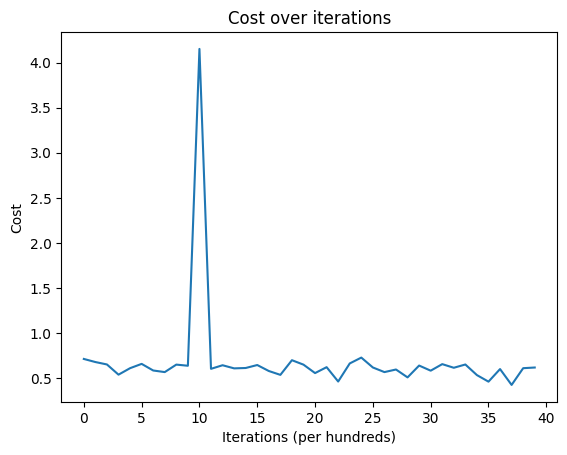

C:\Users\dell\AppData\Local\Temp\ipykernel_3244\874450032.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')


Accuracy: 50%
Cost after epoch 0: 0.528518537171792
Cost after epoch 100: 0.5621729941524396
Cost after epoch 200: 0.5797532578048723
Cost after epoch 300: 0.6319508468527331
Cost after epoch 400: 0.5793052913682355
Cost after epoch 500: 0.5454591465154963
Cost after epoch 600: 0.6329157799928276
Cost after epoch 700: 0.682329171921838
Cost after epoch 800: 0.49553309734856416
Cost after epoch 900: 0.5619936013439455


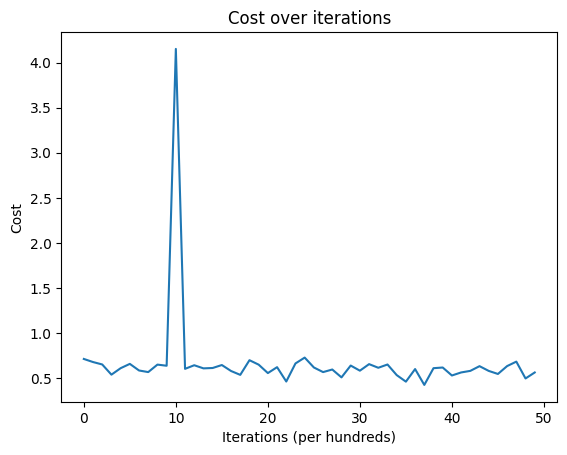

Accuracy: 50%
Cost after epoch 0: 0.6333435712087485
Cost after epoch 100: 0.6395466200420837
Cost after epoch 200: 0.5494340904809214
Cost after epoch 300: 0.5807537484679506
Cost after epoch 400: 0.5976476316295879
Cost after epoch 500: 0.5486548451584492
Cost after epoch 600: 0.6682162963885635
Cost after epoch 700: 0.7029257536011628
Cost after epoch 800: 0.5129349126679487
Cost after epoch 900: 0.5453222650891457


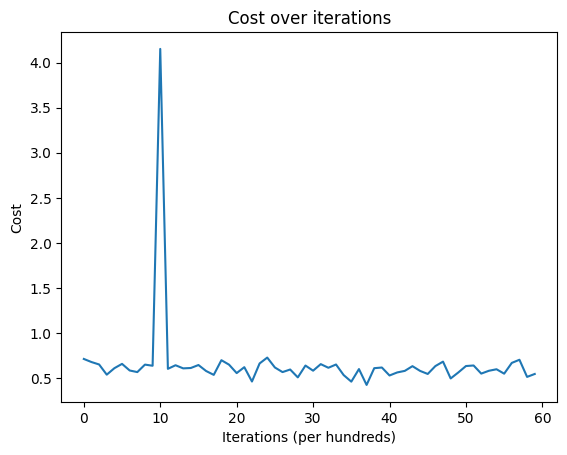

Accuracy: 50%
Cost after epoch 0: 0.6541845371006355
Cost after epoch 100: 0.555905965196928
Cost after epoch 200: 0.632645442947451
Cost after epoch 300: 0.6711948088647053
Cost after epoch 400: 0.6517280984577667
Cost after epoch 500: 0.45702218372200676
Cost after epoch 600: 0.6437814693148771
Cost after epoch 700: 0.5457544349017505
Cost after epoch 800: 0.5793881504891211
Cost after epoch 900: 0.6499478782178563


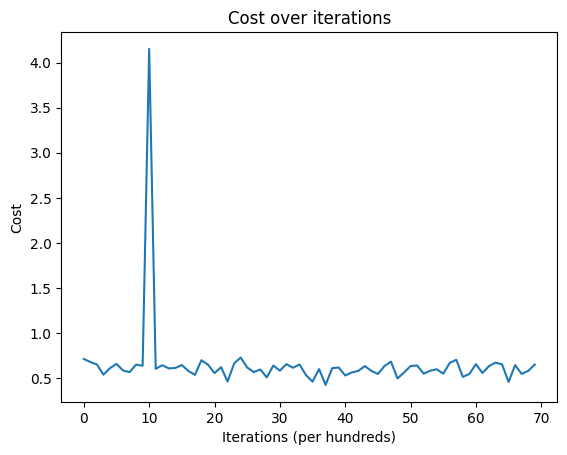

Accuracy: 50%


In [ ]:
# Comparing Last Layer activations
# Model for specific NN architecture

batch_sizes = [16,32,64,128]

for batch_size in batch_sizes:

    parameters, costs = mini_batch_gradient_descent(X, Y, parameters, batch_size=batch_size, learning_rate=0.1, num_epochs=1000, print_cost=True)


    # Plot the cost over iterations
    plt.plot(costs)
    plt.ylabel('Cost')
    plt.xlabel('Iterations (per hundreds)')
    plt.title('Cost over iterations')
    plt.show()

    print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

# Learnings:

**Task1**:

Over the 1000 iterations the gradient descent learns quickly in the first few iterations and then slows down. It may be because of more learnable architecture that learns fast.

**Task2**:

Almost sigmoid, relu and leaky relu has similar performance at the output neuron while Relu performed marginally better.

**Task3**:

Weight Initialization techinques help reach the convergence point earlier while gradient clipping helps the gradients be restricted and not get too larger.

**Task4**:

Larger learning rate has unstable gradient descent but is fast, while smaller learning rate converges to more accurate point but slower.

**Task5**:

Larger batch size takes more time but shows a more smoother curve.
